لجزء I — إعداد البيانات (Setup Task)

In [ ]:
import pandas as pd
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
df.describe(include='all')


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-04-18 22:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


الجزء II — Non-Graphical EDA

Task A: إحصاءات عامة (Central Tendency + Dispersion)

In [ ]:
# إحصاءات عامة للعمود المستهدف
traffic_mean = df['traffic_volume'].mean()
traffic_median = df['traffic_volume'].median()
traffic_mode = df['traffic_volume'].mode()[0]
traffic_std = df['traffic_volume'].std()
traffic_range = df['traffic_volume'].max() - df['traffic_volume'].min()

traffic_mean, traffic_median, traffic_mode, traffic_std, traffic_range


(np.float64(3259.8183553232097),
 3380.0,
 np.int64(353),
 1986.8606704463552,
 7280)

لتحليل:

المتوسط (mean) يمثل القيمة المركزية الحسابية.

الوسيط (median) يُظهر القيمة التي تقسم التوزيع إلى نصفين.

إذا كان mean > median → التوزيع يميل لليمين (right-skewed).

إذا كان mean < median → التوزيع يميل لليسار (left-skewed).

إذا كان mean ≈ median → التوزيع متماثل تقريبًا.
و  عليه   فان التوزيع لدينا يميل لليسار بقيمة صغيرة

 Task B: Skewness و Kurtosis

In [ ]:
traffic_skew = df['traffic_volume'].skew()
traffic_kurt = df['traffic_volume'].kurtosis()

traffic_skew, traffic_kurt


(np.float64(-0.08938135143647916), np.float64(-1.3090882117269556))

*Skewness:
**يساوي الصفر التمثيل متامثل
**أكبر من الصفر التوزيع يميل الى اليمين(right-skewed).
**الصفر أكبر التوزيع يميل الى اليسار(Left-Skewed).
*Kurtosis:
**يساوي الصفر توزيع طبيعي (mesokurtic).
**أكبر من الصفر توزيع حاد (leptokurtic).
**أصغر من الصفر توزيع مسطح (platykurtic).
التحليل skewness:
الإشارة سالبة (-) → يعني أن التوزيع يميل قليلاً نحو اليسار (Left-Skewed).

لكن القيمة قريبة جدًا من الصفر (-0.089) → الانحراف ضعيف جدًا، أي أن التوزيع شبه
متماثل تقريبًا.
وهذا يتطابق مع السوءال السابق.
أي أنا التوزيع العام لحجم المرور (traffic_volume) قريب من الطبيعي، لكنه يميل قليلاً إلى اليسار وأقل حدة من الطبيعي، مما يعني أن القيم متفرقة بشكل متساوٍ تقريبًا عبر المدى.

Task C: التحليل متعدد المتغيرات (Grouping)

In [ ]:
group_stats = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
group_stats


,mean,std
weather_main,,
Clouds,3618.449749,1906.202879
Haze,3502.101471,1873.511057
Rain,3317.905501,1982.228705
Drizzle,3290.727073,1997.901830
Smoke,3237.650000,1978.015893
Clear,3055.908819,1987.101411
Snow,3016.844228,1900.185883
Thunderstorm,3001.620890,1988.296012
Mist,2932.956639,2073.025670


أعلى متوسط:

Clouds (غيوم) = 3618 سيارة/ساعة
** إذن، حركة المرور تكون في أعلى مستوياتها عندما يكون الطقس غائمًا.
** السبب المحتمل: الغيوم لا تعيق الحركة، وغالبًا ما تكون في ساعات النهار أو
.العمل
**أعلى انحراف معياري:

Fog (ضباب) = 2125.5
* يعني أن الضباب هو أكثر حالة يظهر فيها تباين كبير في حجم المرور.
* السبب المحتمل: في بعض فترات الضباب، يقلّ المرور بشدة (خاصة في الصباح الباكر)، بينما قد يكون طبيعيًا في فترات أخرى.

 Rain/Snow تظهر أعلى متوسط.
 حالات Clear أو Clouds  تُظهر تقلبًا أعلى (std أكبر)

الجزء III — Graphical EDA

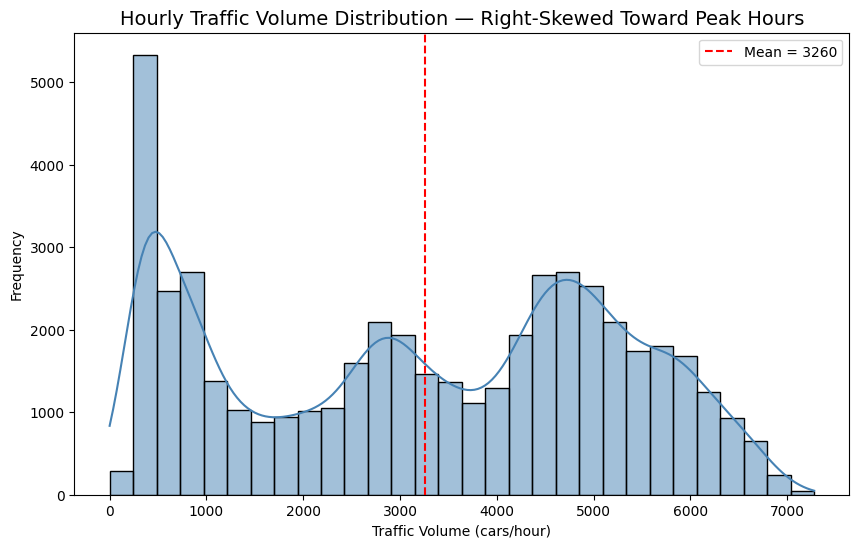

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], bins=30, kde=True, color='steelblue')
plt.axvline(traffic_mean, color='red', linestyle='--', label=f'Mean = {traffic_mean:.0f}')
plt.title("Hourly Traffic Volume Distribution — Right-Skewed Toward Peak Hours", fontsize=14)
plt.xlabel("Traffic Volume (cars/hour)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


ماذا نستنتج من الـ Histogram و Boxplot؟

Histogram يؤكد الانحراف لليمين والقمّة قرب قيمة دنيا/متوسطة.

Boxplot يوضح IQR (Q3-Q1) ومكان الوسيط ويوضح وجود Outliers (القيم أعلى بكثير — ساعات ذروة أو أحداث).

Task B: Box Plot + IQR

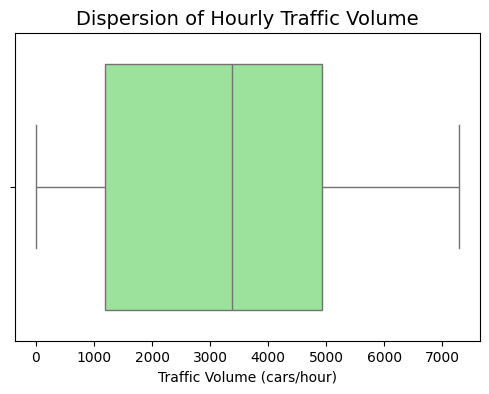

np.float64(3740.0)

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['traffic_volume'], color='lightgreen')
plt.title("Dispersion of Hourly Traffic Volume", fontsize=14)
plt.xlabel("Traffic Volume (cars/hour)")
plt.show()

# حساب IQR = Q3 - Q1
Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1
IQR


Q1 (25%): 25% من الساعات تكون فيها حركة المرور أقل من هذا الرقم.

Q2 (50%): الوسيط (Median) — نصف الساعات أقل منه ونصفها أعلى.

Q3 (75%): 75% من الساعات تحت هذا الرقم.

IQR = Q3 - Q1:
يمثل النطاق الذي يقع فيه 50% من البيانات.
كلما كان IQR كبيرًا ⇒ التشتت أكبر، أي تباين واضح في حجم المرور.
هذا يعني أن نصف البيانات (من 25% إلى 75%) تتراوح بين 1200 و4800 سيارة/ساعة، مما يشير إلى تشتت معتدل إلى كبير في أحجام المرور.



Boxplot يوضح IQR (Q3-Q1) ومكان الوسيط ويوضح وجود Outliers (القيم أعلى بكثير — ساعات ذروة أو أحداث).

Task C: Grouped Box Plots (holiday)

/tmp/ipython-input-3231795577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='traffic_volume', data=df, palette='pastel')


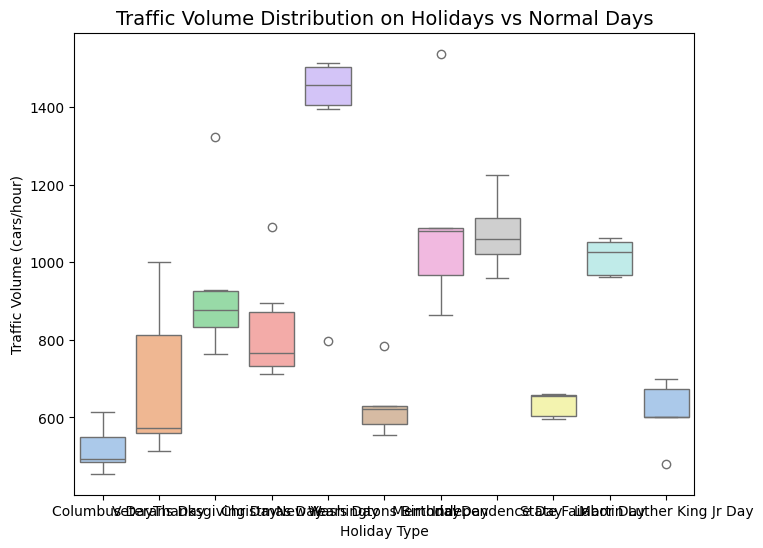

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='holiday', y='traffic_volume', data=df, palette='pastel')
plt.title("Traffic Volume Distribution on Holidays vs Normal Days", fontsize=14)
plt.xlabel("Holiday Type")
plt.ylabel("Traffic Volume (cars/hour)")
plt.show()


أيام العطل (Holiday) لديها حجم مرور أقل بكثير من الأيام العادية.
الوسيط (Median) يكون منخفضًا.
*أيضًا، نطاق التشتت (IQR) يكون أضيق في أيام العطل → أي أن القيم متقاربة.

في المقابل، الأيام العادية (None) تُظهر تشتتًا أكبر → حركة المرور تتفاوت بشدة بين ساعات الذروة وأوقات الليل
**لتشتت والوسيط في الأيام العادية أعلى، مما يعني أن حركة المرور تكون أكثر ازدحامًا وأكثر تفاوتًا من أيام العطل.

2.3 Visualizing Correlation

---Task A: Correlation Matrix + Heatmap



                traffic_volume      temp   rain_1h   snow_1h  clouds_all
traffic_volume        1.000000  0.130299  0.004714  0.000733    0.067054
temp                  0.130299  1.000000  0.009069 -0.019755   -0.101976
rain_1h               0.004714  0.009069  1.000000 -0.000090    0.004818
snow_1h               0.000733 -0.019755 -0.000090  1.000000    0.027931
clouds_all            0.067054 -0.101976  0.004818  0.027931    1.000000


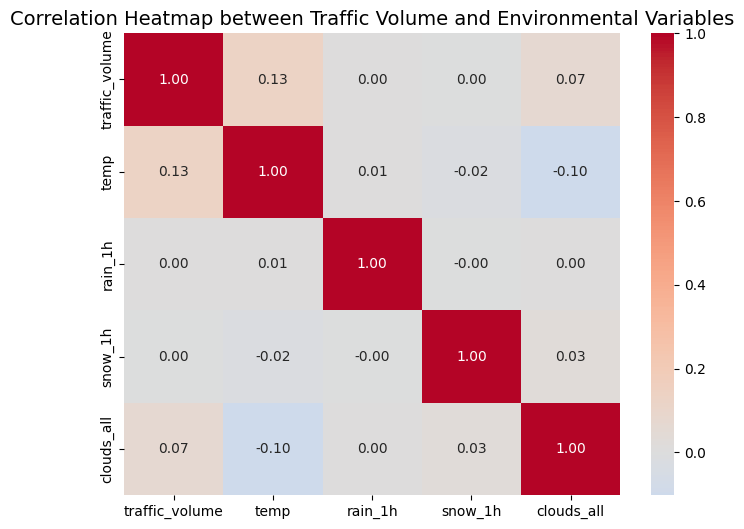

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# تحديد الأعمدة العددية المطلوبة
num_cols = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']

# حساب مصفوفة الارتباط
corr_matrix = df[num_cols].corr()

# عرض القيم
print(corr_matrix)

# رسم heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap between Traffic Volume and Environmental Variables", fontsize=14)
plt.show()


التحليل الكمي

القيم تتراوح بين -1 و +1:

+1 → ارتباط قوي موجب (يزدادان معًا)

-1 → ارتباط قوي سالب (أحدهما يزيد والآخر ينقص)

0 → لا يوجد ارتباط خطي واضح

 2.4 Interactive Charting Tools (Plotly)
 إنشاء Scatter Plot تفاعلي بين الحرارة وحجم المرور

In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x='temp',
    y='traffic_volume',
    color='weather_main',
    hover_data=['weather_description', 'date_time'],
    title="Traffic Volume Tends to Dip in Extreme Temperatures, Regardless of Rain/Snow"
)

fig.update_layout(
    xaxis_title="Temperature (Kelvin)",
    yaxis_title="Traffic Volume (cars/hour)",
    template="plotly_white"
)

fig.show()
